<!-- <h2>Title</h2> -->

---
<h1> 
    National Income Dynamics Study-Coronavirus Rapid Mobile Survey (NIDS-CRAM)<br>
    Wave 1: February - April 2020<br><br>
    The Effect of COVID-19 on the Labour and Welfare of South Africans
</h1>

--- 


<h1> 
Part 2 - Rough Draft
</h1>

--- 


<h2>Group Members</h2>
Dino Anastasopoulos: 1900661 - Contributed towards the Demographics section. <br>
Brenton Budler: 1827655 - Contributed towards the Labour section. <br>
Philani Mpofu: 1848751 - Contributed towards the Welfare section. <br>

--- 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Group-Members" data-toc-modified-id="Group-Members-1">Group Members</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2">Imports</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-3">Read data</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4">Model</a></span><ul class="toc-item"><li><span><a href="#Drop-all-nans" data-toc-modified-id="Drop-all-nans-4.1">Drop all nans</a></span></li><li><span><a href="#Now-this-is-the-dataframe-of-all-people-who-kept-their-jobs,-and-have-usable-data" data-toc-modified-id="Now-this-is-the-dataframe-of-all-people-who-kept-their-jobs,-and-have-usable-data-4.2">Now this is the dataframe of all people who kept their jobs, and have usable data</a></span></li><li><span><a href="#Calculate-and-store-salary-difference" data-toc-modified-id="Calculate-and-store-salary-difference-4.3">Calculate and store salary difference</a></span></li><li><span><a href="#Remove-outliers" data-toc-modified-id="Remove-outliers-4.4">Remove outliers</a></span></li></ul></li><li><span><a href="#Check-value-counts-of-salary-change" data-toc-modified-id="Check-value-counts-of-salary-change-5">Check value counts of salary change</a></span><ul class="toc-item"><li><span><a href="#Encode-some-variables-and-get-dummies" data-toc-modified-id="Encode-some-variables-and-get-dummies-5.1">Encode some variables and get dummies</a></span></li></ul></li><li><span><a href="#Split-into-training-and-testing-data" data-toc-modified-id="Split-into-training-and-testing-data-6">Split into training and testing data</a></span><ul class="toc-item"><li><span><a href="#This-is-just-to-easily-copy-and-paste-columns-for-model---delete-in-submission" data-toc-modified-id="This-is-just-to-easily-copy-and-paste-columns-for-model---delete-in-submission-6.1">This is just to easily copy and paste columns for model - delete in submission</a></span></li></ul></li></ul></div>

## Imports

In [376]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import matplotlib.cm as cm

from matplotlib.colors import Normalize

import statsmodels.formula.api as smf
import statsmodels.api as sm

from IPython.display import display_html,display, Markdown

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from scipy import stats


np.set_printoptions(suppress=True, precision=7)
pd.set_option("display.max_columns",55)


print("Successfully imported all")





Successfully imported all


## Read data

In [377]:
dem = pd.read_csv("Demographics.csv",)
lab = pd.read_csv("Labour.csv")

df = pd.concat([dem,lab],axis=1)

## Model

**Looking at what factors caued people to move province**

In [378]:
dftemp = pd.concat([dem,lab],axis=1)

In [379]:
display(dftemp)
dftemp.shape

,age,gender,race,highest_grade,tertiary_edu,province_current,province_moved,province_before,province_during,labour_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,labour_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,lost_labour,kept_labour,return_to_work,usual_work
0,39.0,Man,White,Grade 9,No,Gauteng,No,NaN,NaN,1,NaN,NaN,180.0,0,0.0,0.0,0.0,1,0,0,Unknown
1,72.0,Woman,Asian/Indian,Grade 0,NaN,KwaZulu-Natal,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
2,30.0,Woman,African/Black,Grade 10,Yes,Gauteng,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
3,48.0,Woman,African/Black,Grade 10,No,Gauteng,No,NaN,NaN,1,3.0,5.0,900.0,0,0.0,0.0,0.0,1,0,1,Elementary occupations
4,49.0,Woman,African/Black,Grade 9,No,Gauteng,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,Man,African/Black,Grade 11,No,Northern Cape,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
7069,24.0,Woman,Coloured,Grade 10,No,Western Cape,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
7070,36.0,Woman,African/Black,NTC 3,No,North West,No,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
7071,20.0,Man,African/Black,Grade 12,No,North West,Yes,Gauteng,Gauteng,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed


(7073, 21)

In [380]:
def fix_race(race):
    if race == "African/Black": return "Black"
    elif race == "Asian/Indian": return "AsInd"
    else: return race
    
    
def fix_province(provinceCurrent, provinceMoved, provinceBefore):
    if provinceMoved == "No":
        province = provinceCurrent
    else:
        province = provinceBefore
        
    return province

def fix_punc(province):
    prov = province.replace(" ", "_")
    prov = prov.replace("-", "_")

    return prov

    
def fix_work(work):
    new_work = work.replace(" ", "_")
    new_work = new_work.replace("-", "_")
    new_work = new_work.replace(",", "")
    return new_work



dftemp["race"] = np.vectorize(fix_race)(dftemp["race"])


#Fix province and puncuation
dftemp["province_before"] = np.vectorize(fix_province)(dftemp["province_current"],dftemp["province_moved"],dftemp["province_before"])

dftemp["province_during"] = np.vectorize(fix_province)(dftemp["province_current"],dftemp["province_moved"],dftemp["province_before"])

dftemp["province_before"] = np.vectorize(fix_punc)(dftemp["province_before"])

#Fix puncuation in usual work
dftemp["usual_work"] = np.vectorize(fix_work)(dftemp["usual_work"])


dftemp = dftemp[dftemp["province_moved"].notna() & (dftemp["province_moved"] != "nan") & (dftemp["province_before"] != "nan")]
display(dftemp)


# display(dftemp[dftemp["province_before"] == "nan"])

,age,gender,race,highest_grade,tertiary_edu,province_current,province_moved,province_before,province_during,labour_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,labour_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,lost_labour,kept_labour,return_to_work,usual_work
0,39.0,Man,White,Grade 9,No,Gauteng,No,Gauteng,Gauteng,1,NaN,NaN,180.0,0,0.0,0.0,0.0,1,0,0,Unknown
1,72.0,Woman,AsInd,Grade 0,NaN,KwaZulu-Natal,No,KwaZulu_Natal,KwaZulu-Natal,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
2,30.0,Woman,Black,Grade 10,Yes,Gauteng,No,Gauteng,Gauteng,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
3,48.0,Woman,Black,Grade 10,No,Gauteng,No,Gauteng,Gauteng,1,3.0,5.0,900.0,0,0.0,0.0,0.0,1,0,1,Elementary_occupations
4,49.0,Woman,Black,Grade 9,No,Gauteng,No,Gauteng,Gauteng,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,Man,Black,Grade 11,No,Northern Cape,No,Northern_Cape,Northern Cape,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
7069,24.0,Woman,Coloured,Grade 10,No,Western Cape,No,Western_Cape,Western Cape,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
7070,36.0,Woman,Black,NTC 3,No,North West,No,North_West,North West,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed
7071,20.0,Man,Black,Grade 12,No,North West,Yes,Gauteng,Gauteng,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not_Employed


In [381]:
# df_main = dftemp[["age","gender","race","highest_grade","province_current", "tertiary_edu","take_home_pay_feb", "take_home_pay_apr","kept_labour","usual_work"]]


df_main = dftemp[["age","gender","race","highest_grade", "tertiary_edu","province_current", "province_moved", "province_before","province_during","take_home_pay_feb", "take_home_pay_apr","kept_labour","usual_work"]]

df_main[df_main["province_moved"]=="Yes"]

,age,gender,race,highest_grade,tertiary_edu,province_current,province_moved,province_before,province_during,take_home_pay_feb,take_home_pay_apr,kept_labour,usual_work
49,41.0,Woman,Black,Grade 11,No,Gauteng,Yes,Gauteng,Gauteng,800.0,0.0,0,Unknown
53,32.0,Man,Black,Grade 10,Yes,Gauteng,Yes,Free_State,Free State,6500.0,6500.0,1,Plant_and_machine_operators_and_assemblers
100,47.0,Woman,Black,Grade 12,Yes,Mpumalanga,Yes,Mpumalanga,Mpumalanga,0.0,0.0,0,Not_Employed
105,33.0,Man,Black,Grade 11,Yes,Mpumalanga,Yes,Mpumalanga,Mpumalanga,7000.0,NaN,1,Craft_and_related_trades_workers
143,47.0,Woman,Black,Grade 7,NaN,Gauteng,Yes,Gauteng,Gauteng,0.0,0.0,0,Not_Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,47.0,Woman,Black,Grade 12,No,Mpumalanga,Yes,Mpumalanga,Mpumalanga,11000.0,11000.0,1,Unknown
6988,58.0,Woman,Black,Grade 8,NaN,KwaZulu-Natal,Yes,KwaZulu_Natal,KwaZulu-Natal,0.0,0.0,0,Not_Employed
6992,23.0,Woman,Black,Grade 11,Yes,Gauteng,Yes,Gauteng,Gauteng,0.0,0.0,0,Not_Employed
7052,31.0,Man,Black,Grade 12,Yes,Free State,Yes,Gauteng,Gauteng,NaN,0.0,0,Self_Employed


### Drop all nans

In [382]:
display(df_main)
df_main_dropped_nans = df_main.dropna()
# display(df_main_dropped_nans)
print("Number of people who lost their job and moved province: ", len(df_main_dropped_nans[(df_main_dropped_nans["province_moved"]=="Yes") & (df_main_dropped_nans["kept_labour"]==0)]))

print("Number of people who lost their job: ", len(df_main_dropped_nans[ (df_main_dropped_nans["kept_labour"]==0)]))

print("Number of people who moved province: ", len(df_main_dropped_nans[(df_main_dropped_nans["province_moved"]=="Yes")]))

,age,gender,race,highest_grade,tertiary_edu,province_current,province_moved,province_before,province_during,take_home_pay_feb,take_home_pay_apr,kept_labour,usual_work
0,39.0,Man,White,Grade 9,No,Gauteng,No,Gauteng,Gauteng,180.0,0.0,0,Unknown
1,72.0,Woman,AsInd,Grade 0,NaN,KwaZulu-Natal,No,KwaZulu_Natal,KwaZulu-Natal,0.0,0.0,0,Not_Employed
2,30.0,Woman,Black,Grade 10,Yes,Gauteng,No,Gauteng,Gauteng,0.0,0.0,0,Not_Employed
3,48.0,Woman,Black,Grade 10,No,Gauteng,No,Gauteng,Gauteng,900.0,0.0,0,Elementary_occupations
4,49.0,Woman,Black,Grade 9,No,Gauteng,No,Gauteng,Gauteng,0.0,0.0,0,Not_Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,Man,Black,Grade 11,No,Northern Cape,No,Northern_Cape,Northern Cape,0.0,0.0,0,Not_Employed
7069,24.0,Woman,Coloured,Grade 10,No,Western Cape,No,Western_Cape,Western Cape,0.0,0.0,0,Not_Employed
7070,36.0,Woman,Black,NTC 3,No,North West,No,North_West,North West,0.0,0.0,0,Not_Employed
7071,20.0,Man,Black,Grade 12,No,North West,Yes,Gauteng,Gauteng,0.0,0.0,0,Not_Employed


Number of people who lost their job and moved province:  210
Number of people who lost their job:  3583
Number of people who moved province:  254


### Now this is the dataframe of all people who kept their jobs, and have usable data

In [383]:
# # df_main_kept_labour = df_main_diff[(df_main_diff['kept_labour']==1) & (df_main_diff['salary_change']!="None")]


# df_main_lost_labour = df_main_dropped_nans[(df_main_dropped_nans['kept_labour']==0)]

# print(list(df_main_kept_labour))

# display(df_main_kept_labour)


### Calculate and store salary difference

In [384]:

# diff = df_main_kept_labour['take_home_pay_apr'] - df_main_kept_labour['take_home_pay_feb']

# display(diff)

# perc = (diff/df_main_kept_labour['take_home_pay_feb'])* 100

# perc = np.nan_to_num(perc)
# # display(perc)

# df_main_diff = df_main_kept_labour.copy()

# df_main_diff['take_home_pay_difference'] = perc

### Remove outliers

In [385]:
# print("Min percentage change before: ",min(df_main_diff['take_home_pay_difference']))
# print("Max percentage change before: ", max(df_main_diff['take_home_pay_difference']))

# # Removing Income outliers
# df_no_outliers = df_main_diff[df_main_diff["take_home_pay_difference"]<np.percentile(a = df_main_diff["take_home_pay_difference"], q =98)]


# print("\n\n\nMin percentage change after: ",min(df_no_outliers['take_home_pay_difference']))
# print("Max percentage change after: ",max(df_no_outliers['take_home_pay_difference']))
# display(df_no_outliers)

In [386]:
df_newvars = df_main_dropped_nans.copy()

def check_youth(age):
    if age<25: return 1
    else: return 0 

def check_male(gender): 
    if gender == "Man": return 1
    else: return 0
    
def check_female(gender): 
    if gender == "Woman": return 1
    else: return 0
    

def check_matric(highest_grade):
    if highest_grade == "Grade 12": return 1
    else: return 0

def check_tertedu(tertiary_edu):
    if tertiary_edu == "Yes" : return 1 
    else: return 0 
    
def check_work(work):
    new_work = work.replace(" ", "_")
    new_work = new_work.replace("-", "_")
    new_work = new_work.replace(",", "")
    return new_work


def check_white(race):
    if race == "White": return 1
    else: return 0
    
def check_black(race):
    if race == "Black": return 1
    else: return 0

def binarize_moved(moved):
    if moved=="Yes": return 1
    else: return 0
    
XYZ = pd.DataFrame()
XYZ["Age"] = df_newvars["age"]
XYZ["Youth"] = np.vectorize(check_youth)(df_newvars["age"])

XYZ["Race"] = df_newvars["race"]
XYZ["Black"] = np.vectorize(check_black)(df_newvars["race"])
XYZ["White"] = np.vectorize(check_white)(df_newvars["race"])

XYZ["Male"] = np.vectorize(check_male)(df_newvars["gender"])
XYZ["Female"] = np.vectorize(check_female)(df_newvars["gender"])

XYZ["Matric"] = np.vectorize(check_matric)(df_newvars["highest_grade"])
XYZ["Tertiary"] = np.vectorize(check_tertedu)(df_newvars["tertiary_edu"])

XYZ["Province_Moved"] = np.vectorize(binarize_moved)(df_newvars["province_moved"])
XYZ["Province_Before"] = df_newvars["province_before"]
XYZ["Province_During"] = df_newvars["province_during"]
XYZ["Province_Current"] = df_newvars["province_current"]


XYZ["Kept_Labour"] = df_newvars['kept_labour']

XYZ["Usual_Work"] = np.vectorize(check_work)(df_newvars['usual_work']) 

XYZ["Pay_Feb"] = df_newvars["take_home_pay_feb"]
XYZ["Pay_Apr"] = df_newvars["take_home_pay_apr"]

display(XYZ)

,Age,Youth,Race,Black,White,Male,Female,Matric,Tertiary,Province_Moved,Province_Before,Province_During,Province_Current,Kept_Labour,Usual_Work,Pay_Feb,Pay_Apr
0,39.0,0,White,0,1,1,0,0,0,0,Gauteng,Gauteng,Gauteng,0,Unknown,180.0,0.0
2,30.0,0,Black,1,0,0,1,0,1,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
3,48.0,0,Black,1,0,0,1,0,0,0,Gauteng,Gauteng,Gauteng,0,Elementary_occupations,900.0,0.0
4,49.0,0,Black,1,0,0,1,0,0,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
5,34.0,0,Black,1,0,1,0,0,0,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,1,Black,1,0,1,0,0,0,0,Northern_Cape,Northern Cape,Northern Cape,0,Not_Employed,0.0,0.0
7069,24.0,1,Coloured,0,0,0,1,0,0,0,Western_Cape,Western Cape,Western Cape,0,Not_Employed,0.0,0.0
7070,36.0,0,Black,1,0,0,1,0,0,0,North_West,North West,North West,0,Not_Employed,0.0,0.0
7071,20.0,1,Black,1,0,1,0,1,0,1,Gauteng,Gauteng,North West,0,Not_Employed,0.0,0.0


## Check value counts of salary change

In [387]:
display(Markdown("## People who did move "))
print(XYZ[XYZ["Province_Moved"]==1]["Kept_Labour"].value_counts())

display(Markdown("## People who didnt move"))
print(XYZ[XYZ["Province_Moved"]==0]["Kept_Labour"].value_counts())

display(Markdown("## Province Value Counts"))
print(XYZ["Kept_Labour"].value_counts())

## People who did move 

0    210
1     44
Name: Kept_Labour, dtype: int64


## People who didnt move

0    3373
1     661
Name: Kept_Labour, dtype: int64


## Province Value Counts

0    3583
1     705
Name: Kept_Labour, dtype: int64


In [388]:
XYZ["Race"].value_counts()
XYZ = XYZ[XYZ["Race"] != "nan"]
XYZ

,Age,Youth,Race,Black,White,Male,Female,Matric,Tertiary,Province_Moved,Province_Before,Province_During,Province_Current,Kept_Labour,Usual_Work,Pay_Feb,Pay_Apr
0,39.0,0,White,0,1,1,0,0,0,0,Gauteng,Gauteng,Gauteng,0,Unknown,180.0,0.0
2,30.0,0,Black,1,0,0,1,0,1,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
3,48.0,0,Black,1,0,0,1,0,0,0,Gauteng,Gauteng,Gauteng,0,Elementary_occupations,900.0,0.0
4,49.0,0,Black,1,0,0,1,0,0,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
5,34.0,0,Black,1,0,1,0,0,0,0,Gauteng,Gauteng,Gauteng,0,Not_Employed,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,1,Black,1,0,1,0,0,0,0,Northern_Cape,Northern Cape,Northern Cape,0,Not_Employed,0.0,0.0
7069,24.0,1,Coloured,0,0,0,1,0,0,0,Western_Cape,Western Cape,Western Cape,0,Not_Employed,0.0,0.0
7070,36.0,0,Black,1,0,0,1,0,0,0,North_West,North West,North West,0,Not_Employed,0.0,0.0
7071,20.0,1,Black,1,0,1,0,1,0,1,Gauteng,Gauteng,North West,0,Not_Employed,0.0,0.0


### Encode some variables and get dummies

In [389]:
# df_dummies = pd.get_dummies(df_encoded, columns=["race","highest_grade","province_current", "usual_work"], drop_first=True)

LE = LabelEncoder()

# df_dummies = XYZ.copy()

df_dummies = pd.get_dummies(XYZ, columns=["Race","Usual_Work", "Province_Before"])

# df_dummies = pd.get_dummies(XYZ, columns=["Race","Province","Usual_Work"], drop_first=True)

# df_dummies["Race"] = LE.fit_transform(df_dummies["Race"])
# df_dummies["Usual_Work"] = LE.fit_transform(df_dummies["Usual_Work"])

display(df_dummies)
print(df_dummies.columns)

,Age,Youth,Black,White,Male,Female,Matric,Tertiary,Province_Moved,Province_During,Province_Current,Kept_Labour,Pay_Feb,Pay_Apr,Race_AsInd,Race_Black,Race_Coloured,Race_White,Usual_Work_Armed_forces_occupations,Usual_Work_Clerical_support_workers,Usual_Work_Craft_and_related_trades_workers,Usual_Work_Elementary_occupations,Usual_Work_Managers,Usual_Work_Not_Employed,Usual_Work_Not_applicable,Usual_Work_Plant_and_machine_operators_and_assemblers,Usual_Work_Professionals,Usual_Work_Self_Employed,Usual_Work_Service_and_sales_workers,Usual_Work_Skilled_agricultural_forestry_and_fishery_workers,Usual_Work_Technicians_and_associate_professionals,Usual_Work_Unknown,Province_Before_Eastern_Cape,Province_Before_Free_State,Province_Before_Gauteng,Province_Before_KwaZulu_Natal,Province_Before_Limpopo,Province_Before_Mpumalanga,Province_Before_North_West,Province_Before_Northern_Cape,Province_Before_Outside_of_South_Africa,Province_Before_Western_Cape
0,39.0,0,0,1,1,0,0,0,0,Gauteng,Gauteng,0,180.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,30.0,0,1,0,0,1,0,1,0,Gauteng,Gauteng,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,48.0,0,1,0,0,1,0,0,0,Gauteng,Gauteng,0,900.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,49.0,0,1,0,0,1,0,0,0,Gauteng,Gauteng,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,34.0,0,1,0,1,0,0,0,0,Gauteng,Gauteng,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,22.0,1,1,0,1,0,0,0,0,Northern Cape,Northern Cape,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7069,24.0,1,0,0,0,1,0,0,0,Western Cape,Western Cape,0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7070,36.0,0,1,0,0,1,0,0,0,North West,North West,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7071,20.0,1,1,0,1,0,1,0,1,Gauteng,North West,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Index(['Age', 'Youth', 'Black', 'White', 'Male', 'Female', 'Matric',
       'Tertiary', 'Province_Moved', 'Province_During', 'Province_Current',
       'Kept_Labour', 'Pay_Feb', 'Pay_Apr', 'Race_AsInd', 'Race_Black',
       'Race_Coloured', 'Race_White', 'Usual_Work_Armed_forces_occupations',
       'Usual_Work_Clerical_support_workers',
       'Usual_Work_Craft_and_related_trades_workers',
       'Usual_Work_Elementary_occupations', 'Usual_Work_Managers',
       'Usual_Work_Not_Employed', 'Usual_Work_Not_applicable',
       'Usual_Work_Plant_and_machine_operators_and_assemblers',
       'Usual_Work_Professionals', 'Usual_Work_Self_Employed',
       'Usual_Work_Service_and_sales_workers',
       'Usual_Work_Skilled_agricultural_forestry_and_fishery_workers',
       'Usual_Work_Technicians_and_associate_professionals',
       'Usual_Work_Unknown', 'Province_Before_Eastern_Cape',
       'Province_Before_Free_State', 'Province_Before_Gauteng',
       'Province_Before_KwaZulu_Natal', 'Prov

## Split into training and testing data

In [390]:
train, test = train_test_split(df_dummies,test_size=0.2, random_state=100)

In [391]:
display(train)

,Age,Youth,Black,White,Male,Female,Matric,Tertiary,Province_Moved,Province_During,Province_Current,Kept_Labour,Pay_Feb,Pay_Apr,Race_AsInd,Race_Black,Race_Coloured,Race_White,Usual_Work_Armed_forces_occupations,Usual_Work_Clerical_support_workers,Usual_Work_Craft_and_related_trades_workers,Usual_Work_Elementary_occupations,Usual_Work_Managers,Usual_Work_Not_Employed,Usual_Work_Not_applicable,Usual_Work_Plant_and_machine_operators_and_assemblers,Usual_Work_Professionals,Usual_Work_Self_Employed,Usual_Work_Service_and_sales_workers,Usual_Work_Skilled_agricultural_forestry_and_fishery_workers,Usual_Work_Technicians_and_associate_professionals,Usual_Work_Unknown,Province_Before_Eastern_Cape,Province_Before_Free_State,Province_Before_Gauteng,Province_Before_KwaZulu_Natal,Province_Before_Limpopo,Province_Before_Mpumalanga,Province_Before_North_West,Province_Before_Northern_Cape,Province_Before_Outside_of_South_Africa,Province_Before_Western_Cape
4306,24.0,1,0,1,0,1,1,1,0,Gauteng,Gauteng,1,6340.0,7130.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2367,35.0,0,1,0,0,1,0,0,1,KwaZulu-Natal,Gauteng,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1938,31.0,0,1,0,0,1,0,0,0,KwaZulu-Natal,KwaZulu-Natal,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3899,23.0,1,1,0,1,0,1,0,0,Gauteng,Gauteng,1,3800.0,3800.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4466,71.0,0,0,1,1,0,1,1,0,Western Cape,Western Cape,0,17000.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6863,30.0,0,1,0,0,1,1,0,0,KwaZulu-Natal,KwaZulu-Natal,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3468,23.0,1,1,0,1,0,1,0,0,Gauteng,Gauteng,1,3000.0,3300.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
612,35.0,0,1,0,0,1,1,1,0,Limpopo,Limpopo,0,4500.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,39.0,0,1,0,0,1,0,0,0,Gauteng,Gauteng,0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### This is just to easily copy and paste columns for model - delete in submission

In [392]:
cols = train.columns.values
cols =  " + ".join(cols)
cols

'Age + Youth + Black + White + Male + Female + Matric + Tertiary + Province_Moved + Province_During + Province_Current + Kept_Labour + Pay_Feb + Pay_Apr + Race_AsInd + Race_Black + Race_Coloured + Race_White + Usual_Work_Armed_forces_occupations + Usual_Work_Clerical_support_workers + Usual_Work_Craft_and_related_trades_workers + Usual_Work_Elementary_occupations + Usual_Work_Managers + Usual_Work_Not_Employed + Usual_Work_Not_applicable + Usual_Work_Plant_and_machine_operators_and_assemblers + Usual_Work_Professionals + Usual_Work_Self_Employed + Usual_Work_Service_and_sales_workers + Usual_Work_Skilled_agricultural_forestry_and_fishery_workers + Usual_Work_Technicians_and_associate_professionals + Usual_Work_Unknown + Province_Before_Eastern_Cape + Province_Before_Free_State + Province_Before_Gauteng + Province_Before_KwaZulu_Natal + Province_Before_Limpopo + Province_Before_Mpumalanga + Province_Before_North_West + Province_Before_Northern_Cape + Province_Before_Outside_of_South_Afr

# Build the model

In [393]:
personalInfo = smf.logit(formula = "Province_Moved ~ Age + Black + Tertiary + Matric + Male + Pay_Feb", data=train).fit()
personalInfo.summary()

Optimization terminated successfully.
         Current function value: 0.222460
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Province_Moved   No. Observations:                 3425
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.04177
Time:                        00:41:38   Log-Likelihood:                -761.93
converged:                       True   LL-Null:                       -795.14
Covariance Type:            nonrobust   LLR p-value:                 2.203e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8216      0.498     -7.670      0.000      -4.798      -2.845
Age           -0.0239      0.007     -3.194      0.001      -0.038      -0.009
Black          1.7305      0.396      4.369      0.000       0.954       2.507
Tertiary       0.1540      0.165      0.930      0.352      -0.170       0.478
Matric        -0.0428      0.158     -0.271      0.786      -0.352       0.266
Male           0.3855      0.147      2.628      0.009       0.098       0.673
Pay_Feb     4.058e-05   9.33e-06      4.350      0.000    2.23e-05    5.89e-05
==============================================================================
"""

**It seems like the important personal info is Age + Black + Tertiary + Male**

In [394]:
# occupations = smf.logit(formula = "Province_Moved ~ Usual_Work_Armed_forces_occupations + Usual_Work_Clerical_support_workers + Usual_Work_Craft_and_related_trades_workers + Usual_Work_Elementary_occupations + Usual_Work_Managers + Usual_Work_Plant_and_machine_operators_and_assemblers + Usual_Work_Professionals + Usual_Work_Self_Employed + Usual_Work_Service_and_sales_workers + Usual_Work_Skilled_agricultural_forestry_and_fishery_workers + Usual_Work_Technicians_and_associate_professionals", data=train).fit()
occupations.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Province_Moved   No. Observations:                 4282
Model:                          Logit   Df Residuals:                     4270
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                0.007467
Time:                        00:41:39   Log-Likelihood:                -956.63
converged:                      False   LL-Null:                       -963.82
Covariance Type:            nonrobust   LLR p-value:                    0.2120
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -2.7712      0.076    -36.566      0.000      -2.920      -2.623
Usual_Work_Armed_forces_occupations                            -26.5920   2.38e+06  -1.12e-05      1.000   -4.66e+06    4.66e+06
Usual_Work_Clerical_support_workers                             -0.7100      0.513     -1.383      0.167      -1.716       0.296
Usual_Work_Craft_and_related_trades_workers                      0.8253      0.385      2.141      0.032       0.070       1.581
Usual_Work_Elementary_occupations                               -0.1684      0.319     -0.529      0.597      -0.793       0.456
Usual_Work_Managers                                              0.2535      0.471      0.538      0.590      -0.670       1.177
Usual_Work_Plant_and_machine_operators_and_assemblers            0.8413      0.365      2.307      0.021       0.127       1.556
Usual_Work_Professionals                                         0.2173      0.288      0.756      0.450      -0.346       0.781
Usual_Work_Self_Employed                                        -0.1732      0.519     -0.334      0.738      -1.190       0.843
Usual_Work_Service_and_sales_workers                            -0.3643      0.349     -1.044      0.296      -1.048       0.319
Usual_Work_Skilled_agricultural_forestry_and_fishery_workers    -5.0394     18.779     -0.268      0.788     -41.846      31.767
Usual_Work_Technicians_and_associate_professionals              -0.0382      0.467     -0.082      0.935      -0.953       0.877
================================================================================================================================
"""

**Usual_Work_Plant_and_machine_operators_and_assemblers and Usual_Work_Craft_and_related_trades_workers are statistidally significant**

In [421]:
Final_Model = smf.logit(formula = "Province_Moved ~ Age + Black + Male + Pay_Feb + Province_Before_Gauteng", data=train).fit()
Final_Model.summary()

Optimization terminated successfully.
         Current function value: 0.218672
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Province_Moved   No. Observations:                 3425
Model:                          Logit   Df Residuals:                     3419
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.05809
Time:                        01:05:34   Log-Likelihood:                -748.95
converged:                       True   LL-Null:                       -795.14
Covariance Type:            nonrobust   LLR p-value:                 2.124e-18
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.0347      0.491     -8.225      0.000      -4.996      -3.073
Age                        -0.0219      0.007     -2.969      0.003      -0.036      -0.007
Black                       1.7211      0.399      4.308      0.000       0.938       2.504
Male                        0.3738      0.147      2.547      0.011       0.086       0.662
Pay_Feb                  3.688e-05   9.01e-06      4.093      0.000    1.92e-05    5.45e-05
Province_Before_Gauteng     0.8551      0.158      5.425      0.000       0.546       1.164
===========================================================================================
"""

# Hypothesis Testing

$$y = \beta_0 +  \beta_1Age + \beta_2Black  + \beta_3Pay\_Feb + \beta_4Province\_Before\_Gauteng$$

**Null Hypothesis**: Younger black males were more likely to leave the province during the beginning of lockdown than older people.
<br><br>
**Alternative Hypothesis**: Younger black males were equally as likely to leave the province during the beginning of lockdown than older people.

In [419]:
youth = train[(train['Age'] < 25)]["Province_Moved"]
older = train[(train['Age'] >=25)]["Province_Moved"]

black = train[(train['Black'] == 1)]["Province_Moved"]
not_black = train[(train['Black'] == 0)]["Province_Moved"]

In [420]:
# t_value, p_value = stats.ttest_ind(youth, older)
t_value, p_value = stats.ttest_ind(older, youth)

print("t = ", t_value)
print("p = ", p_value/2)

t =  -3.085562680253482
p =  0.0010239537797917067


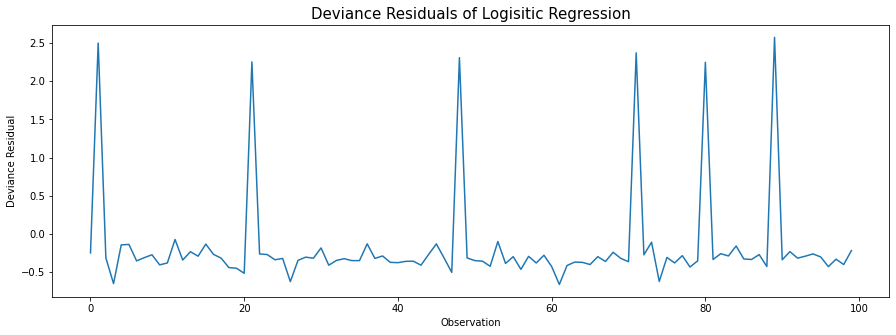

In [405]:
plt.figure(figsize=(15,5))
plots = Final_Model.resid_dev[:100]
plt.plot(range(100), plots.values)
plt.title("Deviance Residuals of Logisitic Regression", fontsize=15)
plt.ylabel("Deviance Residual")
plt.xlabel("Observation")
plt.show()

In [416]:
Test_Model = smf.logit(formula = "Province_Moved ~ Age + Black + Male + Pay_Feb + Province_Before_Gauteng", data=test).fit()
Test_Model.summary()

Optimization terminated successfully.
         Current function value: 0.189811
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Province_Moved   No. Observations:                  857
Model:                          Logit   Df Residuals:                      851
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.02952
Time:                        01:02:24   Log-Likelihood:                -162.67
converged:                       True   LL-Null:                       -167.62
Covariance Type:            nonrobust   LLR p-value:                   0.07825
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.5090      0.903     -4.993      0.000      -6.279      -2.739
Age                         0.0061      0.013      0.452      0.651      -0.020       0.033
Black                       0.9615      0.644      1.493      0.135      -0.300       2.223
Male                        0.6638      0.319      2.079      0.038       0.038       1.290
Pay_Feb                  8.744e-06   2.11e-05      0.413      0.679   -3.27e-05    5.02e-05
Province_Before_Gauteng     0.6746      0.369      1.828      0.068      -0.049       1.398
===========================================================================================
"""

In [411]:
display(Markdown("## Training model regression coefficients"))
print(Final_Model.params)

display(Markdown("## Testing model regression coefficients"))
print(Test_Model.params)

## Training model regression coefficients

Intercept                 -4.034698
Age                       -0.021939
Black                      1.721129
Male                       0.373826
Pay_Feb                    0.000037
Province_Before_Gauteng    0.855118
dtype: float64


## Testing model regression coefficients

Intercept                 -4.508992
Age                        0.006097
Black                      0.961534
Male                       0.663779
Pay_Feb                    0.000009
Province_Before_Gauteng    0.674593
dtype: float64
